In [32]:
num_eps = [6,22,24,14,26,25,25,24,23]
episodes = []
for season in range(1,10):
    for ep in range(1,num_eps[season-1]+1):
        if ep < 10:
            ep_str = "s0" + str(season) + "e0" + str(ep)
        else:
            ep_str = "s0" + str(season) + "e" + str(ep)
        if (not (ep == 11 and season == 3)):
            with open(ep_str, "r") as file:
                episodes.append(file.readline())

In [ ]:
with open("allep", "w+") as file:
    for episode in episodes:
        file.write(episode)
        file.write("\n")

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(episodes)

In [35]:
df = pd.DataFrame(X.toarray())

In [36]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [37]:
for i in vectorizer.get_feature_names():
    if 't' == i:
        print(i)

In [38]:
df.shape

(188, 19238)

In [39]:
df = df.div(df.sum(axis=1), axis=0)

In [40]:
df.to_csv("bow.tsv", sep='\t', header=vectorizer.get_feature_names(), index=False)

In [41]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df)
X_transformed.shape

(188, 2)

In [42]:
dft = pd.DataFrame(X_transformed)
dft.head()

,0,1
0,0.026204,0.006677
1,0.028272,-0.017056
2,0.033020,-0.000610
3,-0.018883,0.026583
4,0.026261,0.024468


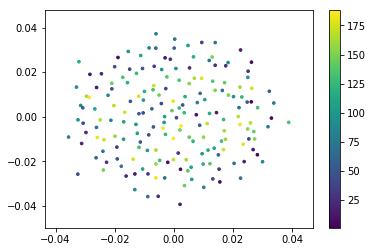

In [45]:
from matplotlib import pyplot as plt
f1 = dft[0].values
f2 = dft[1].values
c = list(range(1,189))
plt.scatter(f1, f2, c=c, s=7)
plt.colorbar()

In [21]:
pd.DataFrame.idxmax(dft,axis=0)

0    38
1    38
dtype: int64

In [22]:
episodes[38]

'None'